<a href="https://colab.research.google.com/github/marimcmurtrie/NLP/blob/main/Mari_McMurtrie_Lab_3_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 : Mari McMurtrie


1.   Download rotten tomatoes dataset from hugging face
2.   Vectorize text via bag of words or tf-idf (set max_features to 100)
3.   Fit a logistic regression model
4.   Inference on test
5.   Print classification report
6.   Write out interpretation of report
7.   References



In [1]:
# Download libraries
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Imports
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


**Download rotten tomatoes dataset from hugging face**


In [3]:
!pip install datasets
from datasets import load_dataset

# Load the Rotten Tomatoes dataset from Hugging Face
dataset = load_dataset("rotten_tomatoes")

# Convert to pandas DataFrame (optional)
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [4]:
# Examine the training data set
'''
text: a string feature.
label: a classification label, with possible values including neg (0), pos (1).
'''
print(df_train.head())
print(df_test.head())

                                                text  label
0  the rock is destined to be the 21st century's ...      1
1  the gorgeously elaborate continuation of " the...      1
2                     effective but too-tepid biopic      1
3  if you sometimes like to go to the movies to h...      1
4  emerges as something rare , an issue movie tha...      1
                                                text  label
0  lovingly photographed in the manner of a golde...      1
1              consistently clever and suspenseful .      1
2  it's like a " big chill " reunion of the baade...      1
3  the story gives ample opportunity for large-sc...      1
4                  red dragon " never cuts corners .      1


In [5]:
# I first pre-process text. I wrote this code in lab2
def normalize_text(corpus: list[str], lemmatizer:WordNetLemmatizer) -> list[str]:
  normalized_corpus: list[str] = []
  for sentence in corpus:
    # Remove non-alphanumeric characters
    alpha_numeric_sentence =re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    # Lower case words.
    alpha_numeric_sentence = alpha_numeric_sentence.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(alpha_numeric_sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Lemmatize text
    lemmatized_sentence = " ".join([lemmatizer.lemmatize(word) for word in filtered_words])
    normalized_corpus.append(lemmatized_sentence)
  return normalized_corpus

lemmatizer = WordNetLemmatizer()
corpus: list[str] = df_train['text'].tolist()
df_train['normalized'] = normalize_text(corpus, lemmatizer)
df_train.tail()

,text,label,normalized
8525,any enjoyment will be hinge from a personal th...,0,enjoyment hinge personal threshold watching sa...
8526,if legendary shlockmeister ed wood had ever ma...,0,legendary shlockmeister ed wood ever made movi...
8527,hardly a nuanced portrait of a young woman's b...,0,hardly nuanced portrait young woman breakdown ...
8528,"interminably bleak , to say nothing of boring .",0,interminably bleak say nothing boring
8529,"things really get weird , though not particula...",0,thing really get weird though particularly sca...


**Vectorize text via bag of words or tf-idf (set max_features to 100)**

In [10]:
# I use TF-IDF
tfidfVectorizer = TfidfVectorizer(max_features=100)
tf_document_term_metrics = tfidfVectorizer.fit_transform(df_train['normalized'])
print(tf_document_term_metrics)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19076 stored elements and shape (8530, 100)>
  Coords	Values
  (0, 63)	0.6418251160934867
  (0, 54)	0.5199763702681223
  (0, 24)	0.5636356045481611
  (3, 47)	0.3830753529695407
  (3, 36)	0.526402634263817
  (3, 60)	0.3043878702003812
  (3, 32)	0.5271541613273428
  (3, 37)	0.4534424497745196
  (4, 47)	0.3221958154418456
  (4, 60)	0.25601359442620286
  (4, 80)	0.43844552935925524
  (4, 85)	0.43608154106241914
  (4, 19)	0.420156698962546
  (4, 29)	0.410969285603583
  (4, 66)	0.32065230065855604
  (5, 24)	0.5898585361687921
  (5, 30)	0.3861795564566983
  (5, 38)	0.7091771693192875
  (7, 37)	0.4434352194181682
  (7, 69)	0.5147852119781714
  (7, 25)	0.5377214580961454
  (7, 53)	0.4992164111996975
  (9, 83)	1.0
  (10, 30)	0.4988883860113645
  (10, 93)	0.8666662438926392
  :	:
  (8522, 17)	0.49206968428424386
  (8522, 16)	0.5307813254331092
  (8522, 26)	0.544719305453322
  (8523, 47)	0.8703589733784818
  (8523, 90)	0.492417767205403

**Fit a logistic regression model**




In [30]:
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(tf_document_term_metrics, df_train['label'])

LogisticRegression(max_iter=1000)

**Inference on test**

In [32]:
#df_test['text'][0]
predictions = lr_model.predict(tfidfVectorizer.transform(df_test['text']))
print(f"LogisticRegression predicted labels for test data: {predictions = }")
print(f"Number of test texts: {len(df_test['text'])}")
print(f"Number of label prediction: {len(predictions)}")

LogisticRegression predicted labels for test data: predictions = array([1, 0, 0, ..., 1, 0, 0])
Number of test texts: 1066
Number of label prediction: 1066


**Print classification report**

In [34]:
report_dict = classification_report(df_test['label'], predictions, output_dict=True)
#print(report_dict)

report_metrics = classification_report(df_test['label'], predictions)
print(report_metrics)

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       533
           1       0.59      0.51      0.55       533

    accuracy                           0.58      1066
   macro avg       0.58      0.58      0.57      1066
weighted avg       0.58      0.58      0.57      1066



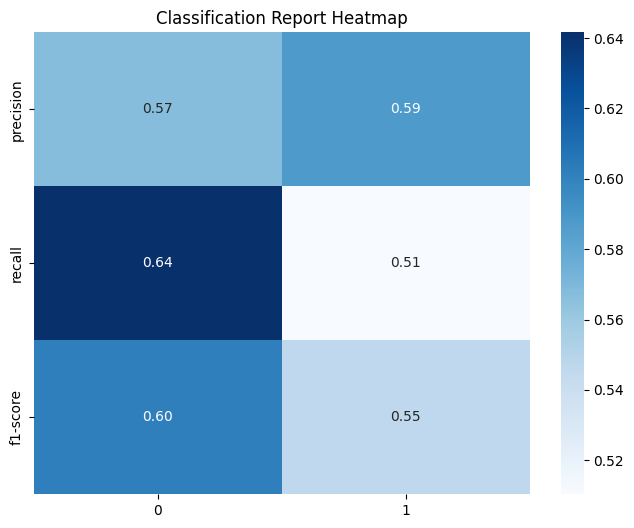

In [35]:
# I want to visualize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_report = pd.DataFrame(report_dict).transpose()
df_report = df_report.drop(columns='support')

plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-3, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

**Write out interpretation of report**

Dataset is a text and label combination where given a text, if it has negative sentinent, it has a label (0), if positive then has label (1).

I split data into train and test sets, normalize training text data, then got document frequency metrics (TF-IDF). Using that document frequency metrics, I ran LogisticRegression and predicted labels for test data.

Findings
*   "precision" - This measures a quality of positive predictions. Very low precision scores for both labels: 0 and 1. Less than 60% accuracy.
*   "recall" - This measures a coverage of actual positives. Negative sentinent is caught better than positive ones.
*   "f1-score" - This measures a balance of both "precision" and "recall". Negative sentinent prediction has slightly better balance than positive ones.




# **References**

*   https://huggingface.co/datasets/cornell-movie-review-data/rotten_tomatoes : dataset
*   https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html : scikit learn TFVectorizer doc
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html " scikit learn classification report doc

